### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

Independent variables are incongruent and congruent since these are the experimental variables that are manipulated and changed to observe the effect on the outcome variable

Dependent variable is the reaction time it takes to read the ink colour on the text name

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Null Hypothesis: There is no significant difference between the two population means under inconguent and congruent conditions

Alternative Hypothesis: The population mean is different under incongruent and congruent conditions

H0: μI - μC = 0

H1: μC ≠ μI

where:

μC is the population mean for the response time taken to identify the colours under congruent conditions

μI is the population mean for the response time taken to identify the colours under incongruent conditions

We will perform a two-tailed dependent t-test to analyze the reactions time for each participant under different conditions since the sample size (X) is very small at only 24. The test should be two-tailed because there can be a difference in the sample means under the incongruent and congruent conditions that could result in the response times to be either positive or negative. This could mean the population means are truely different or just by random chance they are the same. The test should be dependent because the same participants perform the incongruent and congruent tasks. The dataset does not include population μ and σ so a t-test would be more appropriate than a z-test as the population cannot be assumed to be normally distributed.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [45]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Measure of Central Tendency

In [2]:
con_mean = df['Congruent'].mean()
con_mean

14.051124999999999

In [3]:
incon_mean = df['Incongruent'].mean()
incon_mean

22.015916666666666

In [3]:
df['Congruent'].median()

14.3565

In [4]:
df['Incongruent'].median()

21.0175

Measure of Variability

In [35]:
#Standard Deviation
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

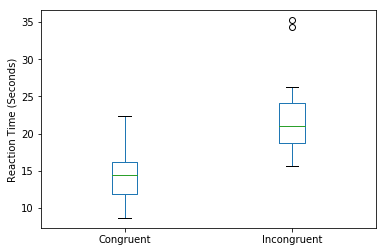

In [5]:
#plot a box chart
df.plot(kind='box');
plt.ylabel('Reaction Time (Seconds)');

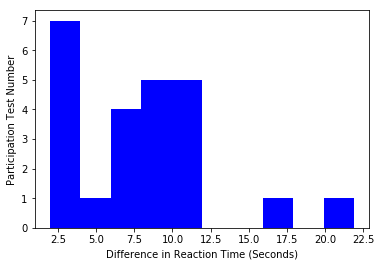

In [18]:
#Calculating and plotting the difference in reaction time
difference = df['Incongruent'] - df['Congruent']
plt.xlabel('Difference in Reaction Time (Seconds)')
plt.ylabel('Participation Test Number')
plt.hist(difference, color='blue');

For incongruent there is a longer reaction time than congruent. From the box plot we can see clear measures of central tendencies and there are some outliers for incongruent to suggest that the response time is significantly higher if we were to take a larger sample size. Majority of the reaction time differences range approximately from 2 - 12 seconds which may indicate a bigger variance.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [10]:
size_10000 = []

for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    incon_mean = sample['Incongruent'].mean()
    con_mean = sample['Congruent'].mean()
    diff = incon_mean - con_mean
    size_10000.append(diff)

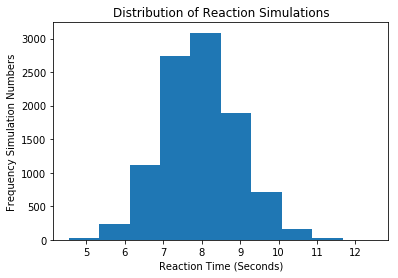

In [31]:
diffs_arr = np.asarray(size_10000)

plt.hist(diffs_arr);
plt.xlabel('Reaction Time (Seconds)');
plt.ylabel('Frequency Simulation Numbers');
plt.title('Distribution of Reaction Simulations');

In [48]:
#calculate the mean difference
diffs_mean = diffs_arr.mean()
diffs_mean

7.958309925

In [46]:
#calculate the standard deviation of the difference
df_diff = df['Incongruent'] - df['Congruent']
std_sample_dist = np.std(df_diff, ddof = 1)
std_sample_dist
print("The standard deviation of the difference is", std_sample_dist)

#calculate the standard error of the mean difference
std_error = std_sample_dist/(math.sqrt(24))
print("The standard error of the mean difference is", std_error)

The standard deviation of the difference is 4.86482691036
The standard error of the mean difference is 0.993028634778


In [47]:
#calculate the t-statistics
t_stat = diffs_mean/std_error
print("The t-statistic value is", t_stat)

The t-statistic value is 8.01417969863


With 95% Confidence Interval

α = 0.05 

Df = 23

t_stat = 8.014

p-value = 2.069

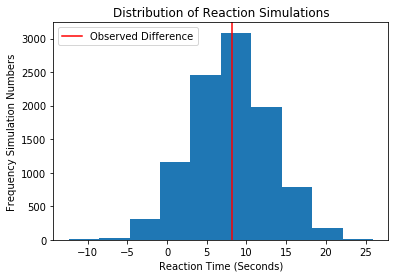

In [34]:
null_vals = np.random.normal(diffs_mean, std_sample_dist, 10000)
plt.hist(null_vals)
plt.axvline(x=incon_mean-con_mean, color='r', label='Observed Difference');
plt.xlabel('Reaction Time (Seconds)');
plt.ylabel('Frequency Simulation Numbers');
plt.title('Distribution of Reaction Simulations');
plt.legend();

# Conclusion

My confidence interval I used is a 95%. Since the t-statistical value of 8.014 > 2.069 which is a significant difference we can confidently reject the null hypothesis. We can safely say that it takes participants longer to react under incongruent conditions that congruent and there really is no significant level of difference with a larger sample size. Intuitively it is common sense that it takes a longer time to process information switch the brain from a visual perception of color to see what is written down on text and verify the correct answer.